## HW3

data science hw#3

In [1]:
import sys
sys.version

'3.9.16 (main, Mar  1 2023, 18:30:21) [MSC v.1916 64 bit (AMD64)]'

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import plotly.express as px
import cufflinks as cf
cf.go_offline(connected=True)

In [3]:
covid = pd.read_csv("C:/Users/Jinseo/data_science_hw/hw3/covid_train4.csv")
meta = pd.read_csv("C:/Users/Jinseo/data_science_hw/hw3/metadata.csv")
policy = pd.read_csv("C:/Users/Jinseo/data_science_hw/hw3/OxCGRT_latest.csv")

In [4]:
print(covid.shape)
print('\n')
print(covid.head())
print('\n')
print(covid.tail())
print('\n')
print('-'*100)

print(meta.shape)
print('\n')
print(meta.head())
print('\n')
print(meta.tail())
print('\n')
print('-'*100)

print(policy.shape)
print('\n')
print(policy.head())
print('\n')
print(policy.tail())
print('\n')

(35995, 6)


   Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0


          Id Province_State Country_Region        Date  ConfirmedCases  \
35990  35991            NaN       Zimbabwe  2020-05-11            36.0   
35991  35992            NaN       Zimbabwe  2020-05-12            36.0   
35992  35993            NaN       Zimbabwe  2020-05-13            37.0   
35993  35994            NaN       Zimbabwe  2020-05-14            37.0   
35994  35995            NaN       Zimbabwe  2020-05-15            42.0   

       Fatalities  
35990         4.0  
35991         4.0  
35992         4.0  
3599

In [5]:
policy['StringencyIndex'].isnull().sum()

1318

In [6]:
#problem 1-2 data cleaning
covid2 = covid.drop('Id',axis=1, inplace=False)
covid2['Province_State'].fillna('',inplace=True)

covid2

,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,,Afghanistan,2020-01-22,0.0,0.0
1,,Afghanistan,2020-01-23,0.0,0.0
2,,Afghanistan,2020-01-24,0.0,0.0
3,,Afghanistan,2020-01-25,0.0,0.0
4,,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...
35990,,Zimbabwe,2020-05-11,36.0,4.0
35991,,Zimbabwe,2020-05-12,36.0,4.0
35992,,Zimbabwe,2020-05-13,37.0,4.0
35993,,Zimbabwe,2020-05-14,37.0,4.0


In [7]:
policy2 = policy.drop(['CountryCode','E1_Income support','E1_Flag','E2_Debt/contract relief','E3_Fiscal measures','E4_International support','H1_Public information campaigns','H1_Flag','H2_Testing policy','H3_Contact tracing','H4_Emergency investment in healthcare','H5_Investment in vaccines','M1_Wildcard','StringencyIndexForDisplay','LegacyStringencyIndex','LegacyStringencyIndexForDisplay'
],axis=1, inplace=False)
policy2

,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,ConfirmedCases,ConfirmedDeaths,StringencyIndex
0,Aruba,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.00
1,Aruba,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.00
2,Aruba,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.00
3,Aruba,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.00
4,Aruba,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22177,Kosovo,20200509,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,862.0,28.0,94.71
22178,Kosovo,20200510,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,870.0,28.0,94.71
22179,Kosovo,20200511,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,884.0,28.0,94.71
22180,Kosovo,20200512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919.0,29.0,NaN


In [8]:
meta['Province_State'].fillna('',inplace=True)

In [9]:
meta

,Country_Region,Province_State,lat,lon,continent,population,area,density
0,Afghanistan,,33.0000,65.0000,Asia,38041754,652230,58.33
1,Albania,,41.1533,20.1683,Europe,2880917,28748,100.21
2,Algeria,,28.0339,1.6596,Africa,43053054,2381741,18.08
3,Andorra,,42.5063,1.5218,Europe,77142,468,164.83
4,Angola,,-11.2027,17.8739,Africa,31825295,1246700,25.53
...,...,...,...,...,...,...,...,...
315,West Bank and Gaza,,31.6000,34.8000,Asia,5190143,6020,862.15
316,Western Sahara,,24.2155,-12.8858,Africa,567402,266000,2.13
317,Yemen,,15.5527,48.5164,Asia,28498683,527968,53.98
318,Zambia,,-15.4167,28.2833,Africa,17861030,752612,23.73


In [10]:
###YOUR CODE HERE###

# print how many null/na values in 'ConfirmedCases' column
policy2['ConfirmedCases'].isnull().sum()

8023

In [11]:
# print how many null/na values in ''ConfirmedDeaths' column
policy2['ConfirmedDeaths'].isnull().sum()

8023

In [12]:
# print how many null/na values in ''StringencyIndex' column
policy2['StringencyIndex'].isnull().sum()

1318

In [13]:
###YOUR CODE HERE###
policy2[['ConfirmedCases','ConfirmedDeaths','StringencyIndex']] = policy2[['ConfirmedCases','ConfirmedDeaths','StringencyIndex']].fillna(0)
# Change null/na value to 0

In [14]:
###YOUR CODE HERE###

#check if null/na value change to 0 or not
policy2['ConfirmedCases'].isnull().sum()

0

In [15]:
policy2['ConfirmedDeaths'].isnull().sum()

0

In [16]:
policy2['StringencyIndex'].isnull().sum()

0

In [17]:
#Problem 1-3 Data Filterling

#Condition 1
date_range = pd.date_range(start = covid2['Date'].min(), end = covid2['Date'].max())
print(date_range)

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09',
               '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15'],
              dtype='datetime64[ns]', length=115, freq='D')


In [18]:
#Condition 2

covid3 = covid2[covid2['Date'] == covid2['Date'].max()]
covid3

,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
114,,Afghanistan,2020-05-15,6053.0,153.0
229,,Albania,2020-05-15,916.0,31.0
344,,Algeria,2020-05-15,6629.0,536.0
459,,Andorra,2020-05-15,761.0,49.0
574,,Angola,2020-05-15,48.0,2.0
...,...,...,...,...,...
35534,,Vietnam,2020-05-15,314.0,0.0
35649,,West Bank and Gaza,2020-05-15,375.0,2.0
35764,,Western Sahara,2020-05-15,6.0,0.0
35879,,Zambia,2020-05-15,654.0,7.0


In [19]:
#Condition3

unique_countries = ['Australia','China','Japan','New Zealand','Singapore','South Korea']
policy3 = policy2[policy2['CountryName'].isin(unique_countries)]
policy3

,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,ConfirmedCases,ConfirmedDeaths,StringencyIndex
947,Australia,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0
948,Australia,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0
949,Australia,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0
950,Australia,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0
951,Australia,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,20200510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22460.0,20.0,0.0
17721,Singapore,20200511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23336.0,20.0,0.0
17722,Singapore,20200512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23787.0,21.0,0.0
17723,Singapore,20200513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24671.0,21.0,0.0


In [20]:
#Probelm 1-4 Data Grouping

covid4 = covid3.groupby(['Country_Region'])[['ConfirmedCases','Fatalities']].sum()
covid4

,ConfirmedCases,Fatalities
Country_Region,,
Afghanistan,6053.0,153.0
Albania,916.0,31.0
Algeria,6629.0,536.0
Andorra,761.0,49.0
Angola,48.0,2.0
...,...,...
Vietnam,314.0,0.0
West Bank and Gaza,375.0,2.0
Western Sahara,6.0,0.0


In [21]:
#Problem 1-5 Data Merging

meta_count = set(meta['Country_Region'])
#Condition 1
covid_count = set(covid3['Country_Region'])

#covid_count
print((meta_count - covid_count))
print((covid_count - meta_count)) #This output is Hint of this problem

{'Tajikistan', 'Comoros', 'Yemen'}
set()


In [22]:
meta

,Country_Region,Province_State,lat,lon,continent,population,area,density
0,Afghanistan,,33.0000,65.0000,Asia,38041754,652230,58.33
1,Albania,,41.1533,20.1683,Europe,2880917,28748,100.21
2,Algeria,,28.0339,1.6596,Africa,43053054,2381741,18.08
3,Andorra,,42.5063,1.5218,Europe,77142,468,164.83
4,Angola,,-11.2027,17.8739,Africa,31825295,1246700,25.53
...,...,...,...,...,...,...,...,...
315,West Bank and Gaza,,31.6000,34.8000,Asia,5190143,6020,862.15
316,Western Sahara,,24.2155,-12.8858,Africa,567402,266000,2.13
317,Yemen,,15.5527,48.5164,Asia,28498683,527968,53.98
318,Zambia,,-15.4167,28.2833,Africa,17861030,752612,23.73


In [23]:
#condition2 
'''
in the meta dataset due to Province_State,
there are many same Country_Region.
We use only dataset which not contain province_State data
'''

right_table = meta.groupby('Country_Region').agg({
                                               'lat': lambda x: x.iloc[0],
                                               'lon': lambda x: x.iloc[0],
                                                'continent' : lambda x: x.iloc[0],
                                                'population': lambda x: sum(x),
                                                'area': lambda x: sum(x),
                                                'density': lambda x: sum(x)})
right_table

,lat,lon,continent,population,area,density
Country_Region,,,,,,
Afghanistan,33.0000,65.0000,Asia,38041754,652230,58.33
Albania,41.1533,20.1683,Europe,2880917,28748,100.21
Algeria,28.0339,1.6596,Africa,43053054,2381741,18.08
Andorra,42.5063,1.5218,Europe,77142,468,164.83
Angola,-11.2027,17.8739,Africa,31825295,1246700,25.53
...,...,...,...,...,...,...
West Bank and Gaza,31.6000,34.8000,Asia,5190143,6020,862.15
Western Sahara,24.2155,-12.8858,Africa,567402,266000,2.13
Yemen,15.5527,48.5164,Asia,28498683,527968,53.98


In [24]:
covid_notlong = pd.merge(covid4, right_table, on = 'Country_Region')
covid_notlong = covid_notlong.reset_index()
covid_notlong
#reset index to row number


,Country_Region,ConfirmedCases,Fatalities,lat,lon,continent,population,area,density
0,Afghanistan,6053.0,153.0,33.0000,65.0000,Asia,38041754,652230,58.33
1,Albania,916.0,31.0,41.1533,20.1683,Europe,2880917,28748,100.21
2,Algeria,6629.0,536.0,28.0339,1.6596,Africa,43053054,2381741,18.08
3,Andorra,761.0,49.0,42.5063,1.5218,Europe,77142,468,164.83
4,Angola,48.0,2.0,-11.2027,17.8739,Africa,31825295,1246700,25.53
...,...,...,...,...,...,...,...,...,...
179,Vietnam,314.0,0.0,16.0000,108.0000,Asia,96462106,331212,291.24
180,West Bank and Gaza,375.0,2.0,31.6000,34.8000,Asia,5190143,6020,862.15
181,Western Sahara,6.0,0.0,24.2155,-12.8858,Africa,567402,266000,2.13
182,Zambia,654.0,7.0,-15.4167,28.2833,Africa,17861030,752612,23.73


In [25]:
#Problem 2 Data Visualizing
#Problem2-1 plot barchart of top10 'ConfirmedCases' and 'Fatalities' in covid_notlong dataset

top10 = covid_notlong.nlargest(10, columns='ConfirmedCases')
#Extract and save top10 data according to the number of ConfirmedCases
top10

,Country_Region,ConfirmedCases,Fatalities,lat,lon,continent,population,area,density
171,US,1442653.0,87525.0,32.3182,-86.9023,Americas,660004393,13647428,7772.28
138,Russia,262843.0,2418.0,60.0000,90.0000,Europe,145872256,17098246,8.53
175,United Kingdom,238004.0,34078.0,18.2206,-63.0686,Europe,68041425,256671,8535.36
156,Spain,230183.0,27459.0,40.0000,-4.0000,Europe,46736776,505992,92.37
84,Italy,223885.0,31610.0,43.0000,12.0000,Europe,60550075,301339,200.94
23,Brazil,220291.0,14962.0,-14.2350,-51.9253,Americas,211049527,8515767,24.78
61,France,179630.0,27532.0,3.9339,-53.1258,Europe,67919979,752910,3671.41
65,Germany,175233.0,7897.0,51.0000,9.0000,Europe,83517045,357114,233.87
170,Turkey,146457.0,4055.0,38.9637,35.2433,Asia,83429615,783562,106.47
80,Iran,116635.0,6902.0,32.0000,53.0000,Asia,82913906,1648195,50.31


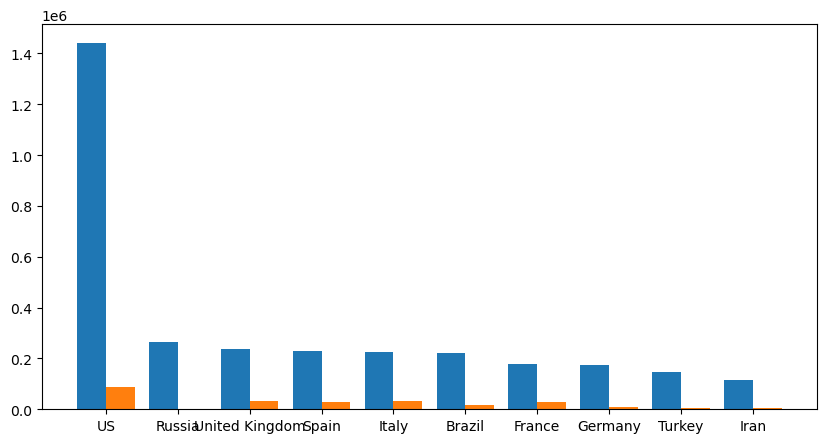

In [26]:
###YOUR CODE HERE###
def create_x(t, w, n, d): # t 막대그래프 너비, w 간격, n 시작위치, d 데이터프레임 길이
    return [t*x + w*n for x in range(d)]
value_a_x = create_x(1.0, 0.4, 0.5, len(top10))
value_b_x = create_x(1.0, 0.4, 1.5, len(top10))
value_a_y = top10['ConfirmedCases']
value_b_y = top10['Fatalities']


fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

middle_x = [x + 0.4 for x in range(len(top10))]

ax.bar(value_a_x,value_a_y, width = 0.4)
ax.bar(value_b_x, value_b_y, width = 0.4)
ax.set_xticks(middle_x)
ax.set_xticklabels(top10['Country_Region'])

plt.show()


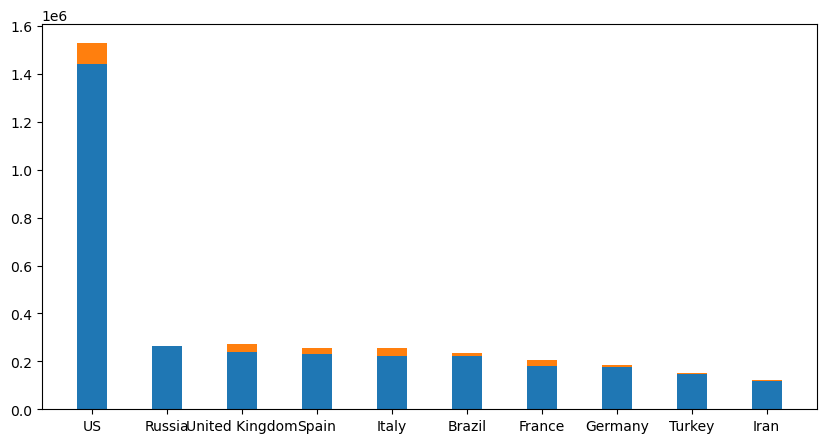

In [27]:
value_a_x = create_x(1.0, 0.4, 1.0, len(top10))
value_b_x = create_x(1.0, 0.4, 1.0, len(top10))
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
ax.bar(value_a_x,value_a_y, width = 0.4)
ax.bar(value_b_x, value_b_y, width = 0.4, bottom=value_a_y)
ax.set_xticks(middle_x)
ax.set_xticklabels(top10['Country_Region'])

plt.show()

In [28]:
'''
Problem2-2 visualizing your data to express 'corona infection situation globally'
if you are not familiar with folium package, refer to the website written at the beginning of the document.
'''
m = folium.Map()

'''
for lat, lon, cases, fatalities, continent, country in zip(covid_notlong['lat'],covid_notlong['lon'],covid_notlong['ConfirmedCases'],covid_notlong['Fatalities'],covid_notlong['continent'],covid_notlong['Country_Region']):
    folium.CircleMarker(
        location = [lat, lon],
        radius=cases/100000
        tooltip = f'Continent: {}<br> Country: {}<br> Confirmed: {}<br> Deaths: {}'.format(continent,country,cases,fatalities),
        color='red'
        fill=True,
        fill_color='red'
        fill_opacity=0.5
        weight=1
    ).add_to(m)
'''

df = covid_notlong
    
for i in range(len(df)):
    folium.CircleMarker(
        location=[df.iloc[i]['lat'], df.iloc[i]['lon']],
        radius=df.iloc[i]['ConfirmedCases']/30000,
        tooltip=f"* Continent: {df.iloc[i]['continent']}<br>* Country: {df.iloc[i]['Country_Region']}<br>* Confirmed: {df.iloc[i]['ConfirmedCases']}<br>* Deaths: {df.iloc[i]['Fatalities']}",
        fill=True,
        fill_color='red',
        fill_opacity=0.2,
        color='red',
        weight=1
    ).add_to(m)
    
m

In [29]:
'''
Problem2-3 visualizing your data(covid_for_visualize.csv) to express 'corona infection situation ' according to date
if you are not familiar with cufflinks package, refer to the website written at the beginning of the document.
'''
import cufflinks as cf
cf.go_offline(connected=True)


In [30]:
data = pd.read_csv('covid_for_visualize.csv')
data

,Date,Australia,China,Japan,NewZealand,Singapore,SouthKorea
0,20200101,0.0,27.0,0.0,0.0,0.0,0.0
1,20200102,0.0,27.0,0.0,0.0,0.0,0.0
2,20200103,0.0,44.0,0.0,0.0,0.0,0.0
3,20200104,0.0,44.0,0.0,0.0,0.0,0.0
4,20200105,0.0,59.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
130,20200510,6929.0,83991.0,15747.0,1144.0,22460.0,10874.0
131,20200511,6941.0,84010.0,15798.0,1147.0,23336.0,10909.0
132,20200512,6948.0,84011.0,15874.0,1147.0,23787.0,10936.0
133,20200513,6964.0,84018.0,16024.0,1147.0,24671.0,10962.0


In [69]:
from datetime import datetime

In [97]:
fig = px.line(data, x='Date', y=['Australia', 'China', 'Japan', 'NewZealand', 'Singapore', 'SouthKorea'], title = 'COVID-19 Confirmed Cases')
fig.show()

In [115]:
fig = px.line(data.melt(id_vars=['Date'], var_name='Country', value_name='Confirmed Cases'), x='Date', y='Confirmed Cases', color='Country', facet_row='Country')


fig.update_traces(fill='tonexty')

fig.show()

In [114]:
fig = px.line(data.melt(id_vars=['Date'], var_name='Country', value_name='Confirmed Cases'), x='Date', y='Confirmed Cases', color='Country', facet_col='Country', facet_col_wrap=2)
fig.show()

In [80]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [81]:
#Problem2-4 visualizing your data to express 'corona infection situation ' according to other factor.

#if you are not familiar with plotly package, refer to the website written at the beginning of the document.


In [93]:
#covid_notlong 사용

newgraphset = covid_notlong[['Country_Region','ConfirmedCases','continent','population','density']]

fig=px.scatter(df, x='population', y="ConfirmedCases", size="density", color="continent", hover_name="Country_Region", log_x=True, log_y = True, size_max = 60)

fig.show()